In [5]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

dataframe = pd.read_stata('dataset.dta')
dataframe.to_csv('dta_to_csv_file.csv')
pd.io.stata.StataReader('dataset.dta').variable_labels()

{'id': 'identification number',
 'ost': 'east/west at draw',
 'branche': 'share in 22 ecnomic sectors',
 'filter': 'innovator filter',
 'gruend': 'Start-ups',
 'zusamm': 'merger',
 'zusamm10': 'increase in sales because of merger',
 'geschl': 'parts of the company closed',
 'geschl10': 'decrease in sales because of closing',
 'absatz': 'Core market of business',
 'um': 'Revenue 2000',
 'ex': 'exports 2000',
 'exno': 'no exports',
 'bges': 'employed',
 'pd': 'Product innovations y/n',
 'pz': 'Process innovation',
 'pa': 'project cancelation',
 'pn': 'Not yet finished projects',
 'pdentw': 'Innovation developer',
 'umneu': 'Revenue share of new/improved products/services',
 'umunw': 'Revenue unchanged products',
 'mneu': 'New products (Y/N)',
 'mneup': 'Revenue share of new products',
 'pzentw': 'Developmer of process innovation',
 'rek': 'cost reduction',
 'rekp': 'cost reduction in percent',
 'iafetz': 'Internal R&D (Y/N)',
 'iafue': 'Expenditure on internal R&D',
 'iavfetz': 'External

In [6]:
dataSet = pd.read_csv('dta_to_csv_file.csv')
print(dataSet)
dataSet.groupby(['branche']).count()
dataSet


      Unnamed: 0      id  ost       branche filter gruend zusamm zusamm10  \
0              0     1.0  ABL    Kunststoff   nein   nein   nein      NaN   
1              1     2.0  NBL      Sonst.DL   nein   nein   nein      NaN   
2              2     3.0  ABL    HolzPapier     ja   nein   nein      NaN   
3              3     4.0  ABL        Metall   nein   nein   nein      NaN   
4              4     5.0  NBL     EDV/Telek   nein   nein   nein      NaN   
5              5     6.0  ABL   Fahrzeugbau     ja   nein   nein      NaN   
6              6     7.0  ABL        Metall     ja   nein   nein      NaN   
7              7     8.0  NBL      EHandKfz     ja   nein   nein      NaN   
8              8     9.0  ABL           UDL     ja   nein   nein      NaN   
9              9    10.0  ABL  Maschinenbau   nein   nein   nein      NaN   
10            10    11.0  NBL      Sonst.DL     ja   nein   nein      NaN   
11            11    12.0  NBL  Verkehr/Post   nein   nein   nein      NaN   

,Unnamed: 0,id,ost,branche,filter,gruend,zusamm,zusamm10,geschl,geschl10,...,bgesep,bhsep,bkost,wb,wbno,inv,invno,invi,invino,mkost
0,0,1.0,ABL,Kunststoff,nein,nein,nein,NaN,nein,NaN,...,0.0,0.0,78.293500,0.354311,nein,16.972841,nein,0.000000,ja,106.581560
1,1,2.0,NBL,Sonst.DL,nein,nein,nein,NaN,nein,NaN,...,15.0,0.0,NaN,1.525725,nein,33.270573,nein,21.965809,nein,NaN
2,2,3.0,ABL,HolzPapier,ja,nein,nein,NaN,nein,NaN,...,0.0,0.0,0.555027,0.000000,ja,0.017127,nein,0.004435,nein,0.406123
3,3,4.0,ABL,Metall,nein,nein,nein,NaN,nein,NaN,...,0.0,0.0,1.762269,0.024826,nein,0.102493,nein,0.005050,nein,NaN
4,4,5.0,NBL,EDV/Telek,nein,nein,nein,NaN,nein,NaN,...,10.0,10.0,0.601373,0.001271,nein,0.002815,nein,0.001368,nein,NaN
5,5,6.0,ABL,Fahrzeugbau,ja,nein,nein,NaN,nein,NaN,...,-30.0,0.0,1.831513,0.000490,nein,0.002340,nein,0.003074,nein,1.751848
6,6,7.0,ABL,Metall,ja,nein,nein,NaN,nein,NaN,...,NaN,NaN,1.107389,0.012125,nein,0.238680,nein,0.084002,nein,0.014395
7,7,8.0,NBL,EHandKfz,ja,nein,nein,NaN,nein,NaN,...,0.0,0.0,0.875919,0.003461,nein,0.093618,nein,0.000000,ja,NaN
8,8,9.0,ABL,UDL,ja,nein,nein,NaN,nein,NaN,...,20.0,0.0,0.275156,0.005011,nein,0.007810,nein,0.005439,nein,NaN
9,9,10.0,ABL,Maschinenbau,nein,nein,nein,NaN,nein,NaN,...,10.0,0.0,0.699124,0.002455,nein,0.053637,nein,0.025159,nein,0.952326


In [7]:
dataSet['branche'].value_counts()
df = dataSet.filter(items=['um', 'umneu', 'schutz1'])
print(df)


               um       umneu schutz1
0      410.083980         NaN    nein
1       41.936646         NaN     NaN
2        1.829996         x=0    nein
3        3.071281  75<=x<=100    nein
4        1.901261  75<=x<=100    nein
5        4.129015         x=0    nein
6        2.382081         x=0    nein
7        1.852963         x=0    nein
8        0.637759         x=0    nein
9        2.069084         NaN    nein
10       2.142230         x=0    nein
11       1.885513         NaN     NaN
12       0.638240         x=0    nein
13       3.598561         x=0     NaN
14       3.147331    30<=x<50    nein
15      50.942936         NaN      ja
16       6.912170    50<=x<75    nein
17      11.699767         NaN    nein
18      12.679031     5<=x<10     NaN
19      45.349953    10<=x<15    nein
20     621.850000     5<=x<10     NaN
21       9.136994         x=0    nein
22       2.439514         NaN    nein
23       0.724860         x=0    nein
24       1.934063         x=0    nein
25       3.3

In [9]:
#algemeen
df.loc[df['schutz1']=='nein']


,um,umneu,schutz1
0,410.083980,NaN,nein
2,1.829996,x=0,nein
3,3.071281,75<=x<=100,nein
4,1.901261,75<=x<=100,nein
5,4.129015,x=0,nein
6,2.382081,x=0,nein
7,1.852963,x=0,nein
8,0.637759,x=0,nein
9,2.069084,NaN,nein
10,2.142230,x=0,nein


                um  umneu schutz1
1409      0.000000    7.0      ja
276       0.000000    8.0      ja
1757      0.000000    8.0      ja
826       0.000000    7.0      ja
897       0.000000    8.0      ja
1485      0.043227    6.0      ja
731       0.076848    0.0      ja
1421      0.093108    6.0      ja
639       0.168045    8.0      ja
1584      0.192651    8.0      ja
1962      0.197713    6.0      ja
443       0.214861    0.0      ja
400       0.248547    0.0      ja
216       0.252925    6.0      ja
497       0.419567    5.0      ja
1089      0.454824    0.0      ja
680       0.474411    0.0      ja
117       0.493455    8.0      ja
1352      0.613640    3.0      ja
1080      0.633819    0.0      ja
426       0.679389    0.0      ja
330       0.702185    0.0      ja
935       0.778153    3.0      ja
609       0.785759    7.0      ja
635       0.848674    0.0      ja
1903      0.869170    0.0      ja
201       0.876163    0.0      ja
1681      0.908117    7.0      ja
379       0.91

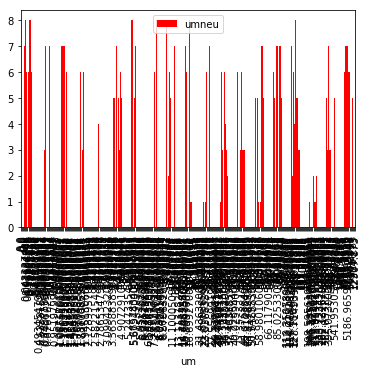

In [45]:
#Patents
#df['schutz1'].dropna()

schutz1 = df['schutz1'].dropna()

dfSchutz1IPTrue = df.loc[df['schutz1']=='ja']

dfSchutz1IPTrue = dfSchutz1IPTrue.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

dfSchutz1IPTrue['umneu'].fillna(0, inplace=True)
dfSchutz1IPTrue['um'].fillna(0, inplace=True)
dfSchutz1IPTrue = dfSchutz1IPTrue.sort_values(by=['um'], ascending=True)
print(dfSchutz1IPTrue)
dfSchutz1IPTrue.plot(kind='bar', x='um', y= 'umneu', color='red')
#Je ziet duidelijk nog niet echt een verband tss revenue en percentueel rev 
#door innovatie. We zullen dus per branche moeten zien hoeveel percentueel innovatie
#bijdraagt per branche.
plt.show()

               branche     umneu
0            Bank/Vers  2.105882
1              Bergbau  0.653846
2               Chemie  2.729167
3            EDV/Telek  4.136364
4             EHandKfz  1.216216
5             ETechnik  4.063492
6         ErnaehrTabak  1.745098
7          Fahrzeugbau  3.093750
8              GHandel  1.285714
9          GlasKeramik  2.000000
10          HolzPapier  2.526316
11          Kunststoff  2.372881
12                MMSR  4.250000
13        Maschinenbau  3.062500
14              Metall  1.666667
15              Moebel  1.764706
16            Sonst.DL  1.409836
17              TechDL  2.744186
18              Textil  1.475000
19                 UDL  2.639344
20        Verkehr/Post  0.669355
21  Wohnung/Vermietung  0.416667


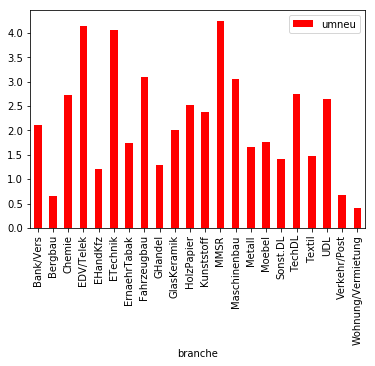

In [49]:
'''Stappenplan percentueel te werk gaan: 
    1. Filter op basis van ip
    2. Maak van de percentages rev door inno een numerieke voorstelling zoals 
    eerder al gedaan
    3. Per branche het gemiddelde tonen aan percentages
    
'''
#Patent
dfCommon = dataSet.filter(items=['branche', 'umneu', 'schutz1'])
dfCommon = dfCommon.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])
dfCommon['branche'].unique()
patentAnalysis = dfCommon.groupby('branche', as_index=False)['umneu'].mean()
print(patentAnalysis)
patentAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='red')